Theres 917 actions in this demonstration  
So each feature is a 512 long vector for each frame

Each video has a feature (for each frame), and a groundtruth file that shows action at each step.   
Mapping is a file that has a number - action mapping


For Per : Feed in 1 data point, 1 ground truth and 1 mask. Mask is set to all true, CLS set to NONE  
```python
Calculating test metrics:
Segments shape: torch.Size([1, 13])
GT shape: torch.Size([1, 13])
Mask shape: torch.Size([1, 13])

Segments: tensor([[0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2]], device='cuda:0')
GT: tensor([[1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2]], device='cuda:0')
Mask: tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True]], device='cuda:0')

CLS None
```

In [ ]:
from metrics import eval_mof, eval_f1, eval_miou, indep_eval_metrics, ClusteringMetrics
import numpy as np
import torch

In [32]:
segs = [
    [0, 0, 0, 1, 2, 2, 2],
    [0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2],
    [0, 0, 1, 1, 2, 2, 2, 2],
    [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
    [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2],
    [0, 0, 1, 1, 2, 2, 2, 2],
    [0, 1, 2, 2, 2],
    [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2],
    [0, 0, 0, 1, 1, 2, 2, 2],
    [0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
    [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
    [0, 0, 1, 1, 1, 2, 2, 2, 2],
    [0, 1, 1, 2, 2, 2, 2, 2],
    [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2],
    [0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2],
    [0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2]
]

segs = [torch.tensor(seg) for seg in segs]
np_segs = [seg.numpy() for seg in segs]

In [33]:
gt = [
    [0, 0, 0, 0, 1, 1, 2],
    [2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [2, 2, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2],
    [1, 1, 0, 0, 0, 2, 2, 2],
    [0, 1, 2, 2, 2],
    [0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2],
    [0, 0, 0, 2, 2, 2, 2, 1],
    [2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2],
    [1, 1, 1, 1, 2, 0, 0, 0, 0],
    [0, 0, 0, 1, 2, 2, 2, 2],
    [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2],
    [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0],
    [2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1]
]

gt = [torch.tensor(x) for x in gt]
np_gt = [x.numpy() for x in gt]
mask = [torch.ones_like(seg).bool() for seg in segs]

len(gt)

16

In [ ]:
# PER METRIC
results = indep_eval_metrics(
    segs, 
    gt,
    mask,
    metrics=['mof', 'f1', 'miou']
)

print(results)

{'mof': 0.8228394869019868, 'f1': 0.7399999949753333, 'miou': 0.6798611111111111}


In [ ]:
# FULL METRIC
mof_score, _ = eval_mof(
    np.concatenate(np_segs), 
    np.concatenate(np_gt),
    n_videos=len(segs)
)

f1_score, _ = eval_f1(
    np.concatenate(np_segs), 
    np.concatenate(np_gt),
    n_videos=len(segs)
)

miou_score, _ = eval_miou(
    np.concatenate(np_segs), 
    np.concatenate(np_gt),
    n_videos=len(segs)
)

print(f"MOF Score: {mof_score:.3f}")
print(f"F1 Score: {f1_score:.3f}")
print(f"mIoU Score: {miou_score:.3f}")

MOF Score: 0.465
F1 Score: 0.457
mIoU Score: 0.299


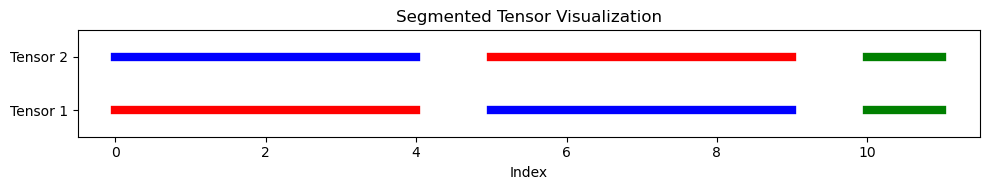

In [1]:
import matplotlib.pyplot as plt
import numpy as np
tensor1 = np.array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])
tensor2 = np.array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

# Generate a figure to visualize the tensors
fig, ax = plt.subplots(figsize=(10, 2))

# Define the colormap and colors for each unique value
colors = {0: 'blue', 1: 'green', 2: 'red'}

# Plot the tensors as colored segments
for i, (tensor, offset) in enumerate(zip([tensor1, tensor2], [0, 1])):
    for start in range(len(tensor)):
        if start == 0 or tensor[start] != tensor[start - 1]:
            end = start + 1
            while end < len(tensor) and tensor[end] == tensor[start]:
                end += 1
            ax.plot([start, end - 1], [offset, offset], lw=6, color=colors[tensor[start]])

# Set limits, labels, and grid
ax.set_xlim(-0.5, max(len(tensor1), len(tensor2)) - 0.5)
ax.set_ylim(-0.5, 1.5)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Tensor 1', 'Tensor 2'])
ax.set_xlabel('Index')
ax.set_title('Segmented Tensor Visualization')

# Show the figure
plt.tight_layout()
plt.show()